In [4]:
# Importing the required libraries.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

- Let us view the data in a dataframe format.

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/Shreyas3108/house-price-prediction/master/kc_house_data.csv")

In [6]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
dt = data[['price','bedrooms', 'sqft_living']]
dt.head()

,price,bedrooms,sqft_living
0,221900.0,3,1180
1,538000.0,3,2570
2,180000.0,2,770
3,604000.0,4,1960
4,510000.0,3,1680


- We will now check if our data set contains any null values or not.

In [8]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<u>__Normalization__</u>

In [9]:
dt_nor = (dt - dt.min()) / (dt.max() - dt.min())

In [10]:
dt_nor.head()

,price,bedrooms,sqft_living
0,0.019266,0.090909,0.067170
1,0.060721,0.090909,0.172075
2,0.013770,0.060606,0.036226
3,0.069377,0.121212,0.126038
4,0.057049,0.090909,0.104906


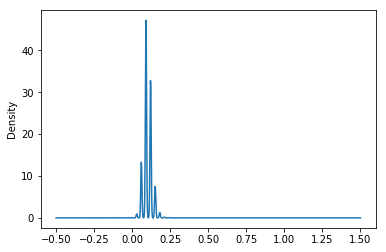

In [11]:
dt_nor['bedrooms'].plot(kind = 'kde')

In [12]:
dt1=np.power(dt_nor['bedrooms'],1/2)

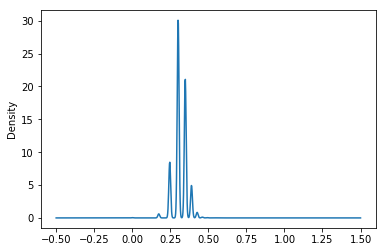

In [13]:
dt1.plot(kind='kde')

<u>__Scaling__</u>

In [14]:
dt2=preprocessing.scale(dt1)
dt2

array([-0.34117945, -0.34117945, -1.59641361, ..., -1.59641361,
       -0.34117945, -1.59641361])

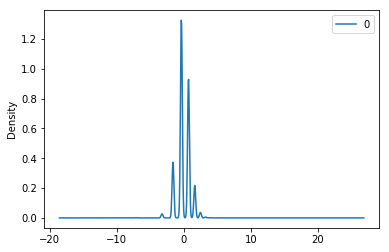

In [15]:
dt2=pd.DataFrame(dt2)
dt2.plot(kind='kde')

<u>__Heatmap__</u>

It shows the correlation between different components of the house.

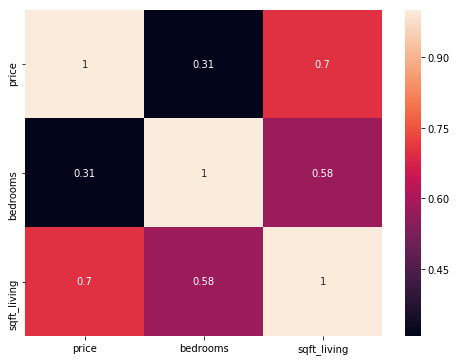

In [50]:
plt.figure(figsize=(8,6)) 
sns.heatmap(dt.corr(),annot=True)

<u>__Linear Regression__</u>

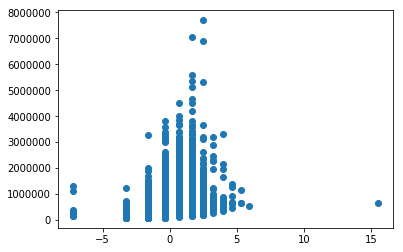

In [21]:
plt.scatter(x = dt2,y = dt['price'])

In [66]:
x = data[['bathrooms','sqft_living']]
y = data['price']

In [86]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.05)

In [87]:
lreg=LinearRegression()
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
lreg.intercept_ , lreg.coef_ 

(-37728.72289267287, array([-820.75405783,  278.48077416]))

In [89]:
dt2_pdct=lreg.predict(X_test)
dt2_pdct

array([ 308730.73669105,  455915.16996667, 1696092.72608794, ...,
        315121.10623207,  369791.31849168,  984207.8868119 ])

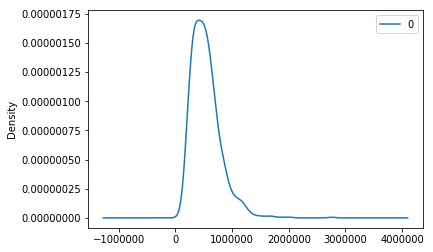

In [90]:
dt2_pdct=pd.DataFrame(dt2_pdct)
dt2_pdct.plot(kind='kde')